[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/11_Batch_Normalization_FashionMnist.ipynb)

# 11 Comparison of Batch Normalization Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [2]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_train.csv to fashion-mnist_train.csv
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes


In [0]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
img_rows, img_cols = 28, 28
input_shpae = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=13)

In [0]:
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

## 3. Building the Neural Network

In [0]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
num_classes = 10
epochs = 100
img_rows, img_cols = 28, 28

### 3.1 without Batch Normalization

In [0]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3,3),input_shape=input_shpae,use_bias=True))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3,3),use_bias=True))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128,(3,3),use_bias=True))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.4))

model_1.add(Flatten())
model_1.add(Dense(128,use_bias=True))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(num_classes,activation='softmax'))
  
model_1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(lr=0.01),metrics=['accuracy'])
  

In [23]:
start = time.time()
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.7147 - acc: 0.7303 - val_loss: 0.4396 - val_acc: 0.8358
Epoch 2/100
 - 4s - loss: 0.4779 - acc: 0.8222 - val_loss: 0.3601 - val_acc: 0.8665
Epoch 3/100
 - 4s - loss: 0.4487 - acc: 0.8344 - val_loss: 0.3462 - val_acc: 0.8697
Epoch 4/100
 - 4s - loss: 0.4369 - acc: 0.8386 - val_loss: 0.3632 - val_acc: 0.8594
Epoch 5/100
 - 4s - loss: 0.4467 - acc: 0.8351 - val_loss: 0.3394 - val_acc: 0.8682
Epoch 6/100
 - 4s - loss: 0.4328 - acc: 0.8405 - val_loss: 0.3546 - val_acc: 0.8612
Epoch 7/100
 - 4s - loss: 0.4215 - acc: 0.8445 - val_loss: 0.3377 - val_acc: 0.8718
Epoch 8/100
 - 4s - loss: 0.4270 - acc: 0.8429 - val_loss: 0.3541 - val_acc: 0.8672
Epoch 9/100
 - 4s - loss: 0.4303 - acc: 0.8421 - val_loss: 0.3629 - val_acc: 0.8637
Epoch 10/100
 - 4s - loss: 0.4270 - acc: 0.8426 - val_loss: 0.3514 - val_acc: 0.8659
Epoch 11/100
 - 4s - loss: 0.4241 - acc: 0.8447 - val_loss: 0.3587 - val_acc: 0.8612
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.4293 - acc: 0.8430 - val_loss: 0.3612 - val_acc: 0.8671
Epoch 35/100
 - 4s - loss: 0.4258 - acc: 0.8441 - val_loss: 0.3430 - val_acc: 0.8691
Epoch 36/100
 - 4s - loss: 0.4270 - acc: 0.8441 - val_loss: 0.3377 - val_acc: 0.8742
Epoch 37/100
 - 4s - loss: 0.4232 - acc: 0.8432 - val_loss: 0.3503 - val_acc: 0.8661
Epoch 38/100
 - 4s - loss: 0.4225 - acc: 0.8459 - val_loss: 0.3419 - val_acc: 0.8708
Epoch 39/100
 - 4s - loss: 0.4251 - acc: 0.8475 - val_loss: 0.3507 - val_acc: 0.8686
Epoch 40/100
 - 4s - loss: 0.4357 - acc: 0.8421 - val_loss: 0.3556 - val_acc: 0.8677
Epoch 41/100
 - 4s - loss: 0.4302 - acc: 0.8420 - val_loss: 0.3569 - val_acc: 0.8625
Epoch 42/100
 - 4s - loss: 0.4381 - acc: 0.8387 - val_loss: 0.3858 - val_acc: 0.8580
Epoch 43/100
 - 4s - loss: 0.4371 - acc: 0.8398 - val_loss: 0.3531 - val_acc: 0.8680
Epoch 44/100
 - 4s - loss: 0.4275 - acc: 0.8453 - val_loss: 0.3497 - val_acc: 0.8646
Epoch 45/100
 - 4s - loss: 0.4205 - acc: 0.8466 - val_loss: 0.3549 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.4248 - acc: 0.8443 - val_loss: 0.3424 - val_acc: 0.8701
Epoch 69/100
 - 4s - loss: 0.4334 - acc: 0.8420 - val_loss: 0.3457 - val_acc: 0.8731
Epoch 70/100
 - 4s - loss: 0.4209 - acc: 0.8437 - val_loss: 0.3509 - val_acc: 0.8675
Epoch 71/100
 - 4s - loss: 0.4280 - acc: 0.8467 - val_loss: 0.3426 - val_acc: 0.8742
Epoch 72/100
 - 4s - loss: 0.4194 - acc: 0.8464 - val_loss: 0.3587 - val_acc: 0.8630
Epoch 73/100
 - 4s - loss: 0.4413 - acc: 0.8392 - val_loss: 0.3447 - val_acc: 0.8687
Epoch 74/100
 - 4s - loss: 0.4302 - acc: 0.8431 - val_loss: 0.3519 - val_acc: 0.8718
Epoch 75/100
 - 4s - loss: 0.4418 - acc: 0.8393 - val_loss: 0.3566 - val_acc: 0.8650
Epoch 76/100
 - 4s - loss: 0.4266 - acc: 0.8453 - val_loss: 0.3688 - val_acc: 0.8600
Epoch 77/100
 - 4s - loss: 0.4336 - acc: 0.8412 - val_loss: 0.3608 - val_acc: 0.8664
Epoch 78/100
 - 4s - loss: 0.4460 - acc: 0.8390 - val_loss: 0.3606 - val_acc: 0.8689
Epoch 79/100
 - 4s - loss: 0.4351 - acc: 0.8420 - val_loss: 0.365

In [24]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 87.39 %     loss = 0.318080
Testing Accuracy = 86.69 %    loss = 0.341137


### 3.2 with Batch Normalization

In [0]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3,3),input_shape=input_shpae,use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3,3),use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128,(3,3),use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.4))

model_2.add(Flatten())
model_2.add(Dense(128,use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(num_classes,activation='softmax'))
  
model_2.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(lr=0.01),metrics=['accuracy'])

In [26]:
start = time.time()
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 7s - loss: 0.5600 - acc: 0.7944 - val_loss: 0.4301 - val_acc: 0.8397
Epoch 2/100
 - 6s - loss: 0.3966 - acc: 0.8551 - val_loss: 0.4369 - val_acc: 0.8188
Epoch 3/100
 - 6s - loss: 0.3592 - acc: 0.8678 - val_loss: 0.3452 - val_acc: 0.8737
Epoch 4/100
 - 6s - loss: 0.3312 - acc: 0.8793 - val_loss: 0.3789 - val_acc: 0.8457
Epoch 5/100
 - 6s - loss: 0.3200 - acc: 0.8824 - val_loss: 0.3033 - val_acc: 0.8882
Epoch 6/100
 - 6s - loss: 0.3035 - acc: 0.8887 - val_loss: 0.3461 - val_acc: 0.8668
Epoch 7/100
 - 6s - loss: 0.2968 - acc: 0.8896 - val_loss: 0.3362 - val_acc: 0.8702
Epoch 8/100
 - 6s - loss: 0.2882 - acc: 0.8938 - val_loss: 0.3090 - val_acc: 0.8836
Epoch 9/100
 - 6s - loss: 0.2792 - acc: 0.8972 - val_loss: 0.2792 - val_acc: 0.8920
Epoch 10/100
 - 6s - loss: 0.2748 - acc: 0.8994 - val_loss: 0.3065 - val_acc: 0.8794
Epoch 11/100
 - 6s - loss: 0.2690 - acc: 0.9008 - val_loss: 0.2600 - val_acc: 0.8997
Epoch 12/100
 - 6s - los

 - 6s - loss: 0.2074 - acc: 0.9225 - val_loss: 0.3467 - val_acc: 0.8820
Epoch 35/100
 - 6s - loss: 0.2102 - acc: 0.9213 - val_loss: 0.2186 - val_acc: 0.9217
Epoch 36/100
 - 6s - loss: 0.2068 - acc: 0.9224 - val_loss: 0.2533 - val_acc: 0.9107
Epoch 37/100
 - 6s - loss: 0.2059 - acc: 0.9220 - val_loss: 0.2312 - val_acc: 0.9172
Epoch 38/100
 - 7s - loss: 0.2064 - acc: 0.9229 - val_loss: 0.2392 - val_acc: 0.9134
Epoch 39/100
 - 7s - loss: 0.1986 - acc: 0.9249 - val_loss: 0.2180 - val_acc: 0.9209
Epoch 40/100
 - 6s - loss: 0.2041 - acc: 0.9244 - val_loss: 0.2480 - val_acc: 0.9100
Epoch 41/100
 - 6s - loss: 0.2040 - acc: 0.9223 - val_loss: 0.2547 - val_acc: 0.9067
Epoch 42/100
 - 7s - loss: 0.1991 - acc: 0.9244 - val_loss: 0.2841 - val_acc: 0.8953
Epoch 43/100
 - 6s - loss: 0.2008 - acc: 0.9242 - val_loss: 0.2492 - val_acc: 0.9103
Epoch 44/100
 - 6s - loss: 0.1988 - acc: 0.9244 - val_loss: 0.2186 - val_acc: 0.9194
Epoch 45/100
 - 6s - loss: 0.1931 - acc: 0.9256 - val_loss: 0.2369 - val_acc: 

Epoch 68/100
 - 6s - loss: 0.1764 - acc: 0.9333 - val_loss: 0.2224 - val_acc: 0.9227
Epoch 69/100
 - 6s - loss: 0.1789 - acc: 0.9322 - val_loss: 0.2245 - val_acc: 0.9203
Epoch 70/100
 - 6s - loss: 0.1772 - acc: 0.9332 - val_loss: 0.2134 - val_acc: 0.9255
Epoch 71/100
 - 6s - loss: 0.1765 - acc: 0.9335 - val_loss: 0.2637 - val_acc: 0.9048
Epoch 72/100
 - 7s - loss: 0.1764 - acc: 0.9329 - val_loss: 0.2332 - val_acc: 0.9186
Epoch 73/100
 - 6s - loss: 0.1742 - acc: 0.9349 - val_loss: 0.2199 - val_acc: 0.9210
Epoch 74/100
 - 6s - loss: 0.1733 - acc: 0.9341 - val_loss: 0.2200 - val_acc: 0.9231
Epoch 75/100
 - 6s - loss: 0.1753 - acc: 0.9330 - val_loss: 0.2336 - val_acc: 0.9185
Epoch 76/100
 - 6s - loss: 0.1765 - acc: 0.9329 - val_loss: 0.2469 - val_acc: 0.9151
Epoch 77/100
 - 7s - loss: 0.1723 - acc: 0.9354 - val_loss: 0.2073 - val_acc: 0.9281
Epoch 78/100
 - 6s - loss: 0.1742 - acc: 0.9336 - val_loss: 0.2134 - val_acc: 0.9225
Epoch 79/100
 - 6s - loss: 0.1727 - acc: 0.9340 - val_loss: 0.223

In [27]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 97.09 %     loss = 0.083686
Testing Accuracy = 92.83 %    loss = 0.198827


## Plot the Result and Compare

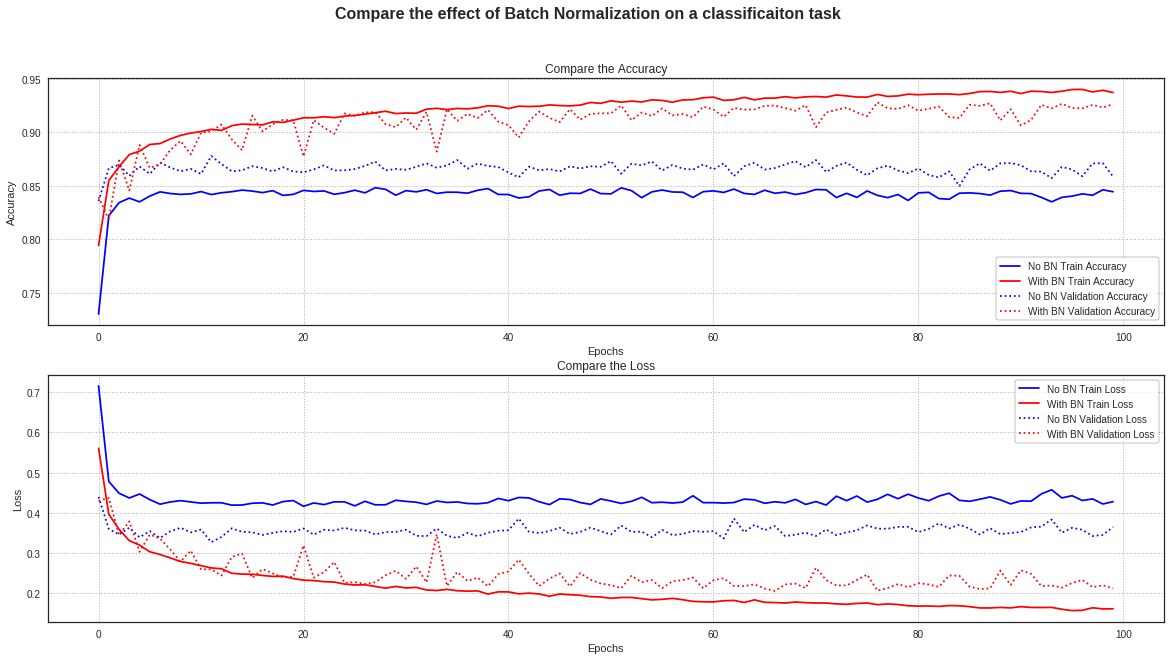

In [28]:
plt.style.use('seaborn-white')
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color='blue',label='No BN Train Accuracy')
ax1.plot(model_2_history.history['acc'],color='red',label='With BN Train Accuracy')
ax1.plot(model_1_history.history['val_acc'],color='blue',linestyle=':',label='No BN Validation Accuracy')
ax1.plot(model_2_history.history['val_acc'],color='red',linestyle=':',label='With BN Validation Accuracy')

ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Accuracy')

ax2.plot(model_1_history.history['loss'],color='blue',label='No BN Train Loss')
ax2.plot(model_2_history.history['loss'],color='red',label='With BN Train Loss')
ax2.plot(model_1_history.history['val_loss'],color='blue',linestyle=':',label='No BN Validation Loss')
ax2.plot(model_2_history.history['val_loss'],color='red',linestyle=':',label='With BN Validation Loss')

ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Loss')

fig.suptitle('Compare the effect of Batch Normalization on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()